<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Supress-autoscrolling" data-toc-modified-id="Supress-autoscrolling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Supress autoscrolling</a></span></li><li><span><a href="#Write-out-a-single-sounding-to-a-csv-file-for-future-work" data-toc-modified-id="Write-out-a-single-sounding-to-a-csv-file-for-future-work-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Write out a single sounding to a csv file for future work</a></span></li><li><span><a href="#turn-off-log(0)-warning" data-toc-modified-id="turn-off-log(0)-warning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>turn off log(0) warning</a></span></li><li><span><a href="#find-the-$\theta_{es}$-of-the--LCL" data-toc-modified-id="find-the-$\theta_{es}$-of-the--LCL-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>find the $\theta_{es}$ of the  LCL</a></span><ul class="toc-item"><li><span><a href="#What-is-the-LCL-of-this-air?" data-toc-modified-id="What-is-the-LCL-of-this-air?-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>What is the LCL of this air?</a></span></li></ul></li><li><span><a href="#Use-the-new-routine-tinvert_thetae-to-rootfind-the-mixture-temperature" data-toc-modified-id="Use-the-new-routine-tinvert_thetae-to-rootfind-the-mixture-temperature-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Use the new routine tinvert_thetae to rootfind the mixture temperature</a></span><ul class="toc-item"><li><span><a href="#find-the-density-of-100-mixtures-of-cloud-and-environment-at-600-hPa" data-toc-modified-id="find-the-density-of-100-mixtures-of-cloud-and-environment-at-600-hPa-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>find the density of 100 mixtures of cloud and environment at 600 hPa</a></span></li></ul></li></ul></div>

# Supress autoscrolling

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
from pprint import pformat
import numpy as np
import json

from a500.thermo.constants import constants as c
from a500.thermo.thermlib import convertSkewToTemp, convertTempToSkew
from a500.skewT.fullskew import makeSkewWet,find_corners,make_default_labels

In [3]:
from a500.soundings.wyominglib import write_soundings, read_soundings
from matplotlib import pyplot as plt

# Write out a single sounding to a csv file for future work

set get_data=True the first time through, then False for subsequent runs with the stored sounding in save_sounding.csv and metada.json

In [4]:
get_data=True
metafile='metadata.json'
soundingfile='save_sounding.csv'
if get_data:
    values=dict(region='naconf',year='2012',month='7',start='0100',stop='3000',station='72340')
    write_soundings(values, 'littlerock')
    soundings= read_soundings('littlerock')
    the_time=(2012,7,17,0)
    sounding=soundings['sounding_dict'][the_time]
    sounding.to_csv(soundingfile)
    title_string=soundings['attributes']['header']
    index=title_string.find(' Observations at')
    location=title_string[:index]
    print(f'location: {location}')
    units=soundings['attributes']['units'].split(';')
    units_dict={}
    for count,var in enumerate(sounding.columns[1:]):
        units_dict[var]=units[count]
    soundings['attributes']['location']=location
    soundings['attributes']['units']=units
    soundings['attributes']['time']=the_time
    soundings['attributes']['history']='written by mixing_line_calc'
    with open(metafile,'w') as outfile:
        json.dump(soundings['attributes'],outfile,indent=4)
    attributes=soundings['attributes']
else:
    sounding = pd.read_csv(soundingfile)
    with open(metafile,'r') as infile:
        attributes=json.load(infile)
        
    

684502
header is:  72340 LZK Little Rock Observations at 00Z 01 Jul 2012
here is the day:  120701
here is the day:  120701
here is the day:  120702
here is the day:  120702
here is the day:  120703
here is the day:  120703
here is the day:  120704
here is the day:  120704
here is the day:  120705
here is the day:  120705
here is the day:  120706
here is the day:  120706
here is the day:  120707
here is the day:  120707
here is the day:  120708
here is the day:  120708
here is the day:  120709
here is the day:  120709
here is the day:  120710
here is the day:  120710
here is the day:  120711
here is the day:  120711
here is the day:  120712
here is the day:  120712
here is the day:  120713
here is the day:  120713
here is the day:  120714
here is the day:  120714
here is the day:  120715
here is the day:  120715
here is the day:  120716
here is the day:  120716
here is the day:  120717
here is the day:  120717
here is the day:  120718
here is the day:  120718
here is the day:  120719
he

# turn off log(0) warning

In [5]:
np.seterr(all='ignore');

# find the $\theta_{es}$ of the  LCL

In [6]:
from a405.thermo.thermlib import find_Tmoist,find_thetaep,find_rsat,find_Tv,find_lcl,find_thetaes,find_thetaet
#
# find thetae of the surface air, at index 0
#
sfc_press,sfc_temp,sfc_td =[sounding[key][0] for key in ['pres','temp','dwpt']]
#
sfc_press,sfc_temp,sfc_td = sfc_press*100.,sfc_temp+c.Tc,sfc_td+c.Tc

## What is the LCL of this air?

In [7]:
Tlcl, plcl=find_lcl(sfc_td, sfc_temp,sfc_press)

In [8]:
print(f'found Tlcl={Tlcl} K, plcl={plcl} Pa')

found Tlcl=294.4007025615702 K, plcl=87210.42355322924 Pa


In [9]:
#  convert to mks and find surface rv and thetae
#
sfc_rvap = find_rsat(sfc_td,sfc_press)
lcl_rvap = find_rsat(Tlcl,plcl)
sfc_thetae=find_thetaes(Tlcl,plcl)
press=sounding['pres'].values*100.
#
# find the index for 100 hPa pressure -- searchsorted requires
# the pressure array to be increasing, so flip it for the search,
# then flip the index.  Above 100 hPa thetae goes bananas, so
# so trim so we only have good values
#
toplim=len(press) - np.searchsorted(press[::-1],.7e4)
clipped_press=press[:toplim]
#
# find temps along that adiabat
#
adia_temps= np.array([find_Tmoist(sfc_thetae,the_press) 
                      for the_press in clipped_press])
#
# find the liquid water content for the adiabat by subtracting
# the vapor mixing ratio from the sfc mixing ratio
#
adia_rvaps = find_rsat(adia_temps,clipped_press)
adia_rls = sfc_rvap - adia_rvaps
env_temps = (sounding['temp'].values + c.Tc)[:toplim]
env_Td = (sounding['dwpt'].values + c.Tc)[:toplim]
height = sounding['hght'].values[:toplim]
pairs = zip(env_Td,clipped_press)
env_rvaps= np.array([find_rsat(td,the_press) for td,the_press in pairs])
env_Tv = find_Tv(env_temps,env_rvaps)
adia_Tv = find_Tv(adia_temps,adia_rvaps,adia_rls)
press_hPa = clipped_press*1.e-2

# Use the new routine tinvert_thetae to rootfind the mixture temperature

In [10]:
from a405.thermo.thermlib import tinvert_thetae

## find the density of 100 mixtures of cloud and environment at 600 hPa

pressure,   580 hPa  dewpoint   268 K , temp   274 K
cloud thetae 356.820 K, env_thetae 333.560 K


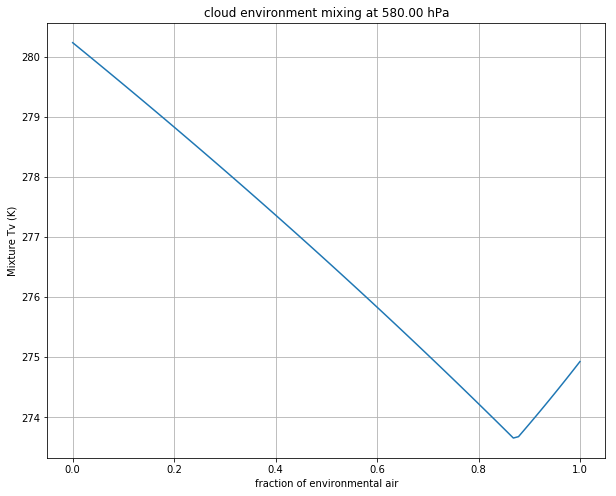

In [11]:
mix_level=np.searchsorted(clipped_press[::-1],600.e2)
index=len(clipped_press) - mix_level
mix_press = clipped_press[index]
print('pressure, {:5.3g} hPa  dewpoint {:5.3g} K , temp {:5.3g} K'\
     .format(clipped_press[index]*1.e-2,env_Td[index],env_temps[index]))
env_rvap = env_rvaps[index]
env_thetae = find_thetaet(env_Td[index],env_rvaps[index],env_temps[index],\
                          clipped_press[index])
print(f'cloud thetae {sfc_thetae:5.3f} K, env_thetae {env_thetae:5.3f} K')
#
# make 100 mixtures
#
fenv=np.linspace(0,1,100)
logthetae_mix = fenv*np.log(env_thetae) + (1 - fenv)*np.log(sfc_thetae)
rTot_mix = fenv*env_rvap  + (1 - fenv)*sfc_rvap
thetae_mix = np.exp(logthetae_mix)
pairs = zip(thetae_mix,rTot_mix)
Tvlist = []
#
# find the virtual temperature for each mixture
#
for thetae,rtot in pairs:
    temp,rv,rl = tinvert_thetae(thetae,rtot,mix_press)
    Tvlist.append(find_Tv(temp,rv,rl))
fig,ax = plt.subplots(1,1,figsize=(10,8))
ax.plot(fenv,Tvlist)
title='cloud environment mixing at {:5.2f} hPa'.format(clipped_press[index]*1.e-2)
out=ax.set(xlabel='fraction of environmental air',ylabel='Mixture Tv (K)',title=title)
ax.grid(True,which='both')